In [29]:
library(party)
library(randomForest)
library(readr)
library(dplyr)
library(tictoc)

In [30]:
df <- as.data.frame(read_csv('credit_train.csv'))

Parsed with column specification:
cols(
  `Loan ID` = col_character(),
  `Customer ID` = col_character(),
  `Loan Status` = col_character(),
  `Current Loan Amount` = col_integer(),
  Term = col_character(),
  `Credit Score` = col_integer(),
  `Annual Income` = col_integer(),
  `Years in current job` = col_character(),
  `Home Ownership` = col_character(),
  Purpose = col_character(),
  `Monthly Debt` = col_double(),
  `Years of Credit History` = col_double(),
  `Months since last delinquent` = col_integer(),
  `Number of Open Accounts` = col_integer(),
  `Number of Credit Problems` = col_integer(),
  `Current Credit Balance` = col_integer(),
  `Maximum Open Credit` = col_integer(),
  Bankruptcies = col_integer(),
  `Tax Liens` = col_integer()
)


In [31]:
sapply(df,class)
# There are a ton of NAs

Loan ID                  Customer ID 
                 "character"                  "character" 
                 Loan Status          Current Loan Amount 
                 "character"                    "integer" 
                        Term                 Credit Score 
                 "character"                    "integer" 
               Annual Income         Years in current job 
                   "integer"                  "character" 
              Home Ownership                      Purpose 
                 "character"                  "character" 
                Monthly Debt      Years of Credit History 
                   "numeric"                    "numeric" 
Months since last delinquent      Number of Open Accounts 
                   "integer"                    "integer" 
   Number of Credit Problems       Current Credit Balance 
                   "integer"                    "integer" 
         Maximum Open Credit                 Bankruptcies 
                   "integer"                    "integer" 
                   Tax Liens 
                   "integer"

In [32]:
df <- na.omit(df)

In [33]:
head(df,2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
3,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741,2231892,8 years,Own Home,Debt Consolidation,29200.53,14.9,29,18,1,297996,750090,0,0
7,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730,1184194,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10,13,1,122170,272052,1,0


In [34]:
df <- select(df,-`Loan ID`,-`Customer ID`) 

In [35]:
library(caret)
dummy <- dummyVars("~ .", data = df,fullRank = TRUE, sep=".")

In [36]:
features <- as.data.frame(predict(dummy, df))

In [37]:
head(features,3)

,`Loan Status`Fully Paid,`Current Loan Amount`,TermShort Term,`Credit Score`,`Annual Income`,`Years in current job`1 year,`Years in current job`10+ years,`Years in current job`2 years,`Years in current job`3 years,`Years in current job`4 years,...,Purposewedding,`Monthly Debt`,`Years of Credit History`,`Months since last delinquent`,`Number of Open Accounts`,`Number of Credit Problems`,`Current Credit Balance`,`Maximum Open Credit`,Bankruptcies,`Tax Liens`
3,1,99999999,1,741,2231892,0,0,0,0,0,...,0,29200.53,14.9,29,18,1,297996,750090,0,0
7,1,217646,1,730,1184194,0,0,0,0,0,...,0,10855.08,19.6,10,13,1,122170,272052,1,0
9,1,548746,1,678,2559110,0,0,1,0,0,...,0,18660.28,22.6,33,4,0,437171,555038,0,0


In [38]:
colnames(features) <- gsub("`", "", colnames(features))
colnames(features) <- gsub(" ", ".", colnames(features))
colnames(features) <- gsub("\\+", "plus", colnames(features))
colnames(features) <- gsub("\\/", "", colnames(features))
# In R, use \\ to grab special character
head(features,1)

,Loan.StatusFully.Paid,Current.Loan.Amount,TermShort.Term,Credit.Score,Annual.Income,Years.in.current.job1.year,Years.in.current.job10plus.years,Years.in.current.job2.years,Years.in.current.job3.years,Years.in.current.job4.years,...,Purposewedding,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens
3,1,1e+08,1,741,2231892,0,0,0,0,0,...,0,29200.53,14.9,29,18,1,297996,750090,0,0


In [39]:
colnames(features)

[1] "Loan.StatusFully.Paid"            "Current.Loan.Amount"             
 [3] "TermShort.Term"                   "Credit.Score"                    
 [5] "Annual.Income"                    "Years.in.current.job1.year"      
 [7] "Years.in.current.job10plus.years" "Years.in.current.job2.years"     
 [9] "Years.in.current.job3.years"      "Years.in.current.job4.years"     
[11] "Years.in.current.job5.years"      "Years.in.current.job6.years"     
[13] "Years.in.current.job7.years"      "Years.in.current.job8.years"     
[15] "Years.in.current.job9.years"      "Years.in.current.jobna"          
[17] "Home.OwnershipHome.Mortgage"      "Home.OwnershipOwn.Home"          
[19] "Home.OwnershipRent"               "PurposeBuy.a.Car"                
[21] "PurposeBuy.House"                 "PurposeDebt.Consolidation"       
[23] "PurposeEducational.Expenses"      "PurposeHome.Improvements"        
[25] "Purposemajor_purchase"            "PurposeMedical.Bills"            
[27] "Purposemoving"                    "Purposeother"                    
[29] "PurposeOther"                     "Purposerenewable_energy"         
[31] "Purposesmall_business"            "PurposeTake.a.Trip"              
[33] "Purposevacation"                  "Purposewedding"                  
[35] "Monthly.Debt"                     "Years.of.Credit.History"         
[37] "Months.since.last.delinquent"     "Number.of.Open.Accounts"         
[39] "Number.of.Credit.Problems"        "Current.Credit.Balance"          
[41] "Maximum.Open.Credit"              "Bankruptcies"                    
[43] "Tax.Liens"

In [40]:
set.seed(100)
train <- sample(nrow(features), 0.75*nrow(features), replace = FALSE)
TrainSet <- features[train,]
TestSet <- features[-train,]

In [41]:
labels <- as.factor(features$Loan.StatusFully.Paid)
features <- select(features, -Loan.StatusFully.Paid)

In [48]:
cat('Training Set Shape:', dim(TrainSet),"\n")
cat('Testing Set Shape:',dim(ValidSet))

Training Set Shape: 28507 43 
Testing Set Shape: 9503 43

In [49]:
tic()
    random_forest = rf <- randomForest(features,labels, ntree=200, importance=TRUE)
toc()

147.46 sec elapsed


In [50]:
print(rf)


Call:
 randomForest(x = features, y = labels, ntree = 200, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 6

        OOB estimate of  error rate: 15.23%
Confusion matrix:
     0     1 class.error
0 2154  5737 0.727030795
1   51 30068 0.001693283


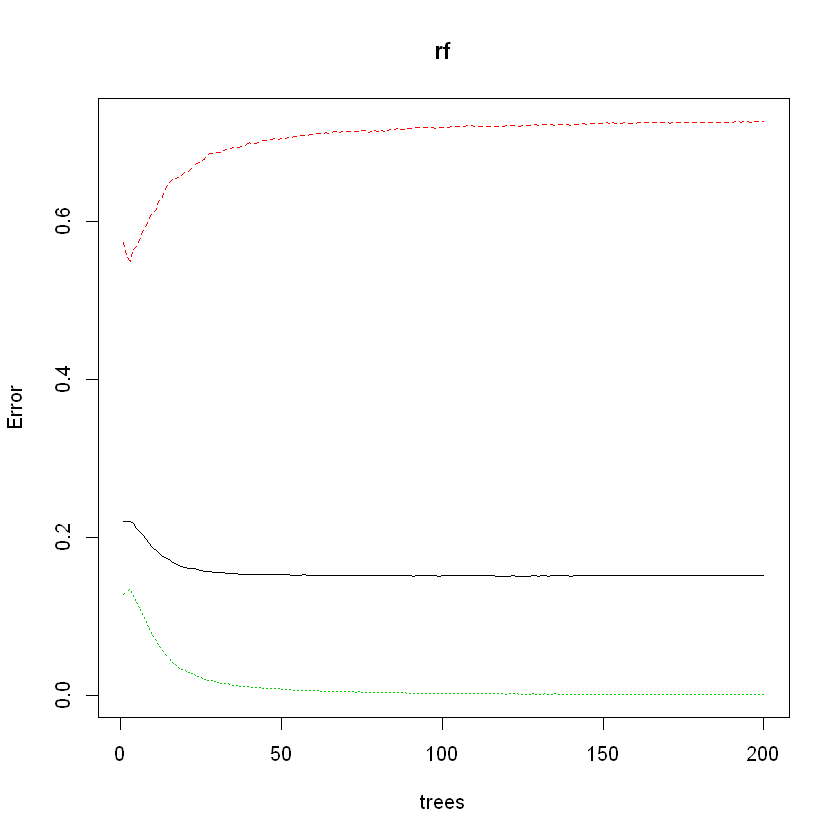

In [51]:
plot(rf)
# Have to find a way to do this in Python

In [52]:
# Predicting on train set
predTrain <- predict(rf, TrainSet, type = "class")
# Checking classification accuracy
table(predTrain, TrainSet$Loan.StatusFully.Paid)  

         
predTrain     0     1
        0  5850     0
        1    71 22586

In [53]:
# Checking classification accuracy
predValid <- predict(rf, ValidSet, type = "class")
mean(predValid == ValidSet$Loan.StatusFully.Paid)                    
table(predValid,ValidSet$Loan.StatusFully.Paid)

[1] 0.9965274

         
predValid    0    1
        0 1937    0
        1   33 7533

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Current.Loan.Amount,29.387386906,48.3954331,52.3775237,1.209113e+03
TermShort.Term,-4.000801569,43.5041663,43.2079373,1.166810e+02
Credit.Score,140.538353535,96.3401324,119.8523456,3.178923e+03
Annual.Income,1.895158684,64.8138750,64.2576876,9.154097e+02
Years.in.current.job1.year,-1.915087661,16.2703764,14.7602309,5.601701e+01
Years.in.current.job10plus.years,0.400332714,19.2123459,19.4619382,9.678420e+01
Years.in.current.job2.years,1.100020398,18.2414098,17.4024527,6.666686e+01
Years.in.current.job3.years,-1.321208212,18.9525163,17.0426214,6.041565e+01
Years.in.current.job4.years,1.174459824,17.5833044,17.4416053,5.283658e+01
Years.in.current.job5.years,-1.729476580,16.5390542,14.6360869,5.929336e+01


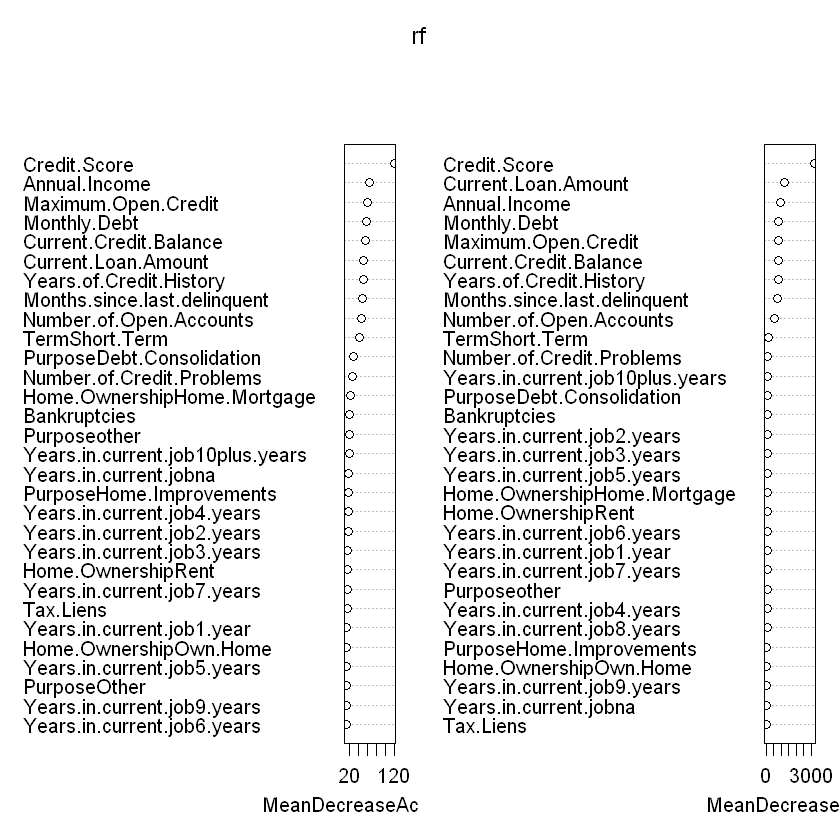

In [54]:
importance(rf)  
varImpPlot(rf)

In [55]:
getTree(rf)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,1,50394547.500,1,0
2,4,5,18,0.500,1,0
3,0,0,0,0.000,-1,2
4,6,7,1,346269.000,1,0
5,8,9,28,0.500,1,0
6,10,11,1,174394.000,1,0
7,12,13,4,1924852.000,1,0
8,14,15,4,1157670.000,1,0
9,16,17,13,0.500,1,0
10,18,19,19,0.500,1,0
